In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, datetime,  statsmodels.formula.api as smf, matplotlib.dates as mdates
from zipfile import ZipFile
from StringIO import StringIO
from scipy import stats
import urllib2
%matplotlib inline
plt.style.use('ggplot')

In [2]:
bike_months2 = [
    '201307',
    '201308',
    '201309',
    '201310',
    '201311',
    '201312',
    '201401',
    '201402',
    '201403',
    '201404',
    '201405',
    '201406',
    '201407',
    '201408'
]

In [3]:
bike_months = [
    '201409',
    '201410',
    '201411',
    '201412',
    '201501',
    '201502',
    '201503',
    '201504',
    '201505',
    '201506',
    '201507',
    '201508',
    '201509',
    '201510',
    '201511'
]

In [4]:
bike_dict = {}
for m in bike_months:
    url = 'https://s3.amazonaws.com/tripdata/%s-citibike-tripdata.zip'%m
    r = urllib2.urlopen(url).read()
    myfile = ZipFile(StringIO(r))
    df_csv = myfile.open('%s-citibike-tripdata.csv'%m)
    df = pd.read_csv(df_csv)
    bike_dict[m] = len(df)
bike_dict

{'201409': 953887,
 '201410': 828711,
 '201411': 529188,
 '201412': 399069,
 '201501': 285552,
 '201502': 196930,
 '201503': 341826,
 '201504': 652390,
 '201505': 961986,
 '201506': 941219,
 '201507': 1085676,
 '201508': 1179044,
 '201509': 1289699,
 '201510': 1212277,
 '201511': 987245}

In [5]:
bike_dict2 = {}
for m in bike_months2:
    url = 'https://s3.amazonaws.com/tripdata/%s-citibike-tripdata.zip'%m
    r = urllib2.urlopen(url).read()
    myfile = ZipFile(StringIO(r))
    df_csv = myfile.open('%s-%s - Citi Bike trip data.csv'%(m[:4],m[4:]))
    df = pd.read_csv(df_csv)
    bike_dict2[m] = len(df)
bike_dict2

{'201307': 843416,
 '201308': 1001958,
 '201309': 1034359,
 '201310': 1037712,
 '201311': 675774,
 '201312': 443966,
 '201401': 300400,
 '201402': 224736,
 '201403': 439117,
 '201404': 670780,
 '201405': 866117,
 '201406': 936880,
 '201407': 968842,
 '201408': 963489}

In [6]:
num_of_trips = bike_dict2.copy()
num_of_trips.update(bike_dict)

In [12]:
for i in num_of_trips.keys():
    num_of_trips[i[:4]+'-'+i[4:]] = num_of_trips.pop(i)
num_of_trips

{'2013-07': 843416,
 '2013-08': 1001958,
 '2013-09': 1034359,
 '2013-10': 1037712,
 '2013-11': 675774,
 '2013-12': 443966,
 '2014-01': 300400,
 '2014-02': 224736,
 '2014-03': 439117,
 '2014-04': 670780,
 '2014-05': 866117,
 '2014-06': 936880,
 '2014-07': 968842,
 '2014-08': 963489,
 '2014-09': 953887,
 '2014-10': 828711,
 '2014-11': 529188,
 '2014-12': 399069,
 '2015-01': 285552,
 '2015-02': 196930,
 '2015-03': 341826,
 '2015-04': 652390,
 '2015-05': 961986,
 '2015-06': 941219,
 '2015-07': 1085676,
 '2015-08': 1179044,
 '2015-09': 1289699,
 '2015-10': 1212277,
 '2015-11': 987245}

In [17]:
trips = pd.DataFrame(num_of_trips.items(),columns=['Month','Num_of_trips'])
trips

,Month,Num_of_trips
0,2014-09,953887
1,2014-08,963489
2,2014-05,866117
3,2014-04,670780
4,2014-07,968842
5,2014-06,936880
6,2014-01,300400
7,2014-03,439117
8,2014-02,224736
9,2013-08,1001958


In [19]:
for i,j in trips['Month'].iteritems():
    trips.loc[i,'Month'] = datetime.datetime.strptime(j, '%Y-%m')
trips['Month']

0     2014-09-01 00:00:00
1     2014-08-01 00:00:00
2     2014-05-01 00:00:00
3     2014-04-01 00:00:00
4     2014-07-01 00:00:00
5     2014-06-01 00:00:00
6     2014-01-01 00:00:00
7     2014-03-01 00:00:00
8     2014-02-01 00:00:00
9     2013-08-01 00:00:00
10    2013-09-01 00:00:00
11    2015-11-01 00:00:00
12    2015-10-01 00:00:00
13    2013-07-01 00:00:00
14    2015-06-01 00:00:00
15    2015-07-01 00:00:00
16    2015-04-01 00:00:00
17    2015-05-01 00:00:00
18    2015-02-01 00:00:00
19    2015-03-01 00:00:00
20    2015-01-01 00:00:00
21    2014-12-01 00:00:00
22    2014-10-01 00:00:00
23    2014-11-01 00:00:00
24    2015-08-01 00:00:00
25    2015-09-01 00:00:00
26    2013-12-01 00:00:00
27    2013-11-01 00:00:00
28    2013-10-01 00:00:00
Name: Month, dtype: object

In [25]:
cbtrips = trips.groupby('Month').mean()['Num_of_trips']

In [26]:
cbtrips

Month
2013-07-01     843416
2013-08-01    1001958
2013-09-01    1034359
2013-10-01    1037712
2013-11-01     675774
2013-12-01     443966
2014-01-01     300400
2014-02-01     224736
2014-03-01     439117
2014-04-01     670780
2014-05-01     866117
2014-06-01     936880
2014-07-01     968842
2014-08-01     963489
2014-09-01     953887
2014-10-01     828711
2014-11-01     529188
2014-12-01     399069
2015-01-01     285552
2015-02-01     196930
2015-03-01     341826
2015-04-01     652390
2015-05-01     961986
2015-06-01     941219
2015-07-01    1085676
2015-08-01    1179044
2015-09-01    1289699
2015-10-01    1212277
2015-11-01     987245
Name: Num_of_trips, dtype: int64

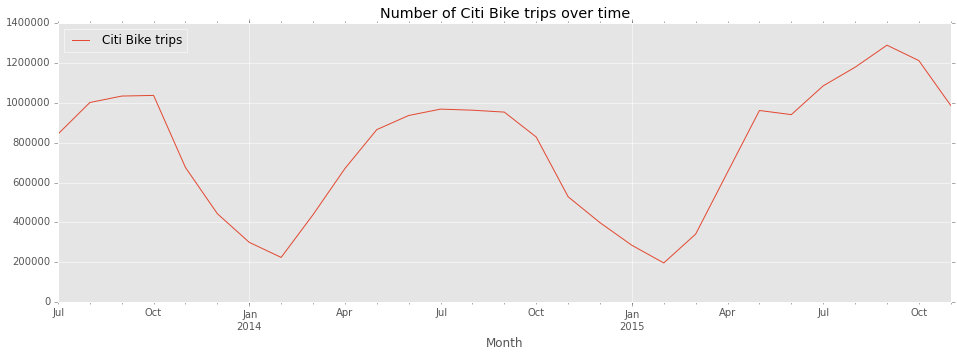

In [28]:
plt.figure(figsize=(16,5))
cbtrips.plot(label='Citi Bike trips')
plt.title('Number of Citi Bike trips over time')
plt.legend(loc=0)

In [33]:
def convertDate(d):
    dt = datetime.datetime.strptime(d, '%m/%d/%Y')
    dt = dt.replace(day=1)
    return dt

df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', converters={'DATE': convertDate})
c_inj_agg = df.groupby('DATE').sum()['NUMBER OF CYCLIST INJURED']
c_k_agg = df.groupby('DATE').sum()['NUMBER OF CYCLIST KILLED']
cyc = c_inj_agg + 10*c_k_agg

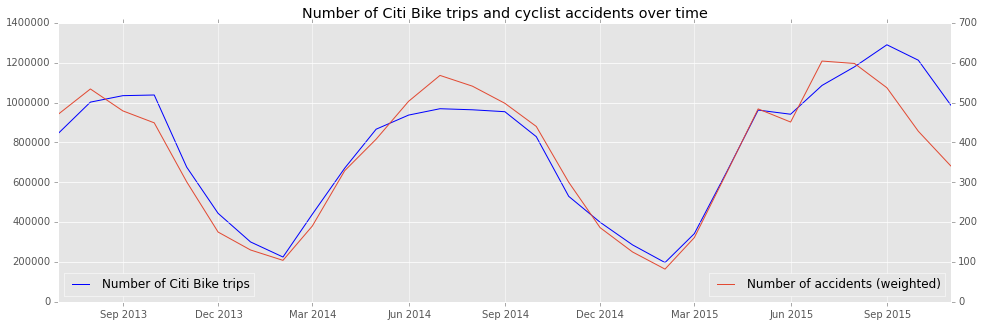

In [60]:
fig, ax1 = plt.subplots(figsize=(16,5))
ax1.plot(cbtrips.index, cbtrips, color='b', label='Number of Citi Bike trips')
ax1.legend(loc=3)
ax2 = ax1.twinx()
cyc_ = cyc[12:-1]
ax2.plot(cyc_.index, cyc_, label='Number of accidents (weighted)')
plt.title('Number of Citi Bike trips and cyclist accidents over time')
plt.xlabel('Months')
ax2.legend(loc=4)

In [55]:
corr=stats.pearsonr(cbtrips,cyc_)[0]
print('Correlation bewteen Citi Bike trips and cyclist accidents: {0}'.format(corr))

Correlation bewteen Citi Bike trips and cyclist accidents: 0.935381167918
